In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('training.csv')
test = pd.read_csv('training.csv')
train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [8]:
print(train.shape)
# print(train.size)
print(train.columns)
# print(train.describe())
# print(train.info)
# print(train.dtypes)

(250000, 33)
Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')


In [10]:
set(train['Label'])

{'b', 's'}

In [11]:
# print(train.isnull().sum())

In [12]:
le = preprocessing.LabelEncoder()
train['Label'] = le.fit_transform(train['Label'])

train.drop('Weight', axis=1,inplace=True)
X = train.loc[:,train.columns != 'Label']
Y = train.loc[:,'Label']

In [13]:
le = preprocessing.LabelEncoder()
test['Label'] = le.fit_transform(test['Label'])

test.drop('Weight', axis=1,inplace=True)
X_test = test.loc[:,train.columns != 'Label']
Y_test = test.loc[:,'Label']

In [14]:
print(X.shape)
print(Y.shape)

(250000, 31)
(250000,)


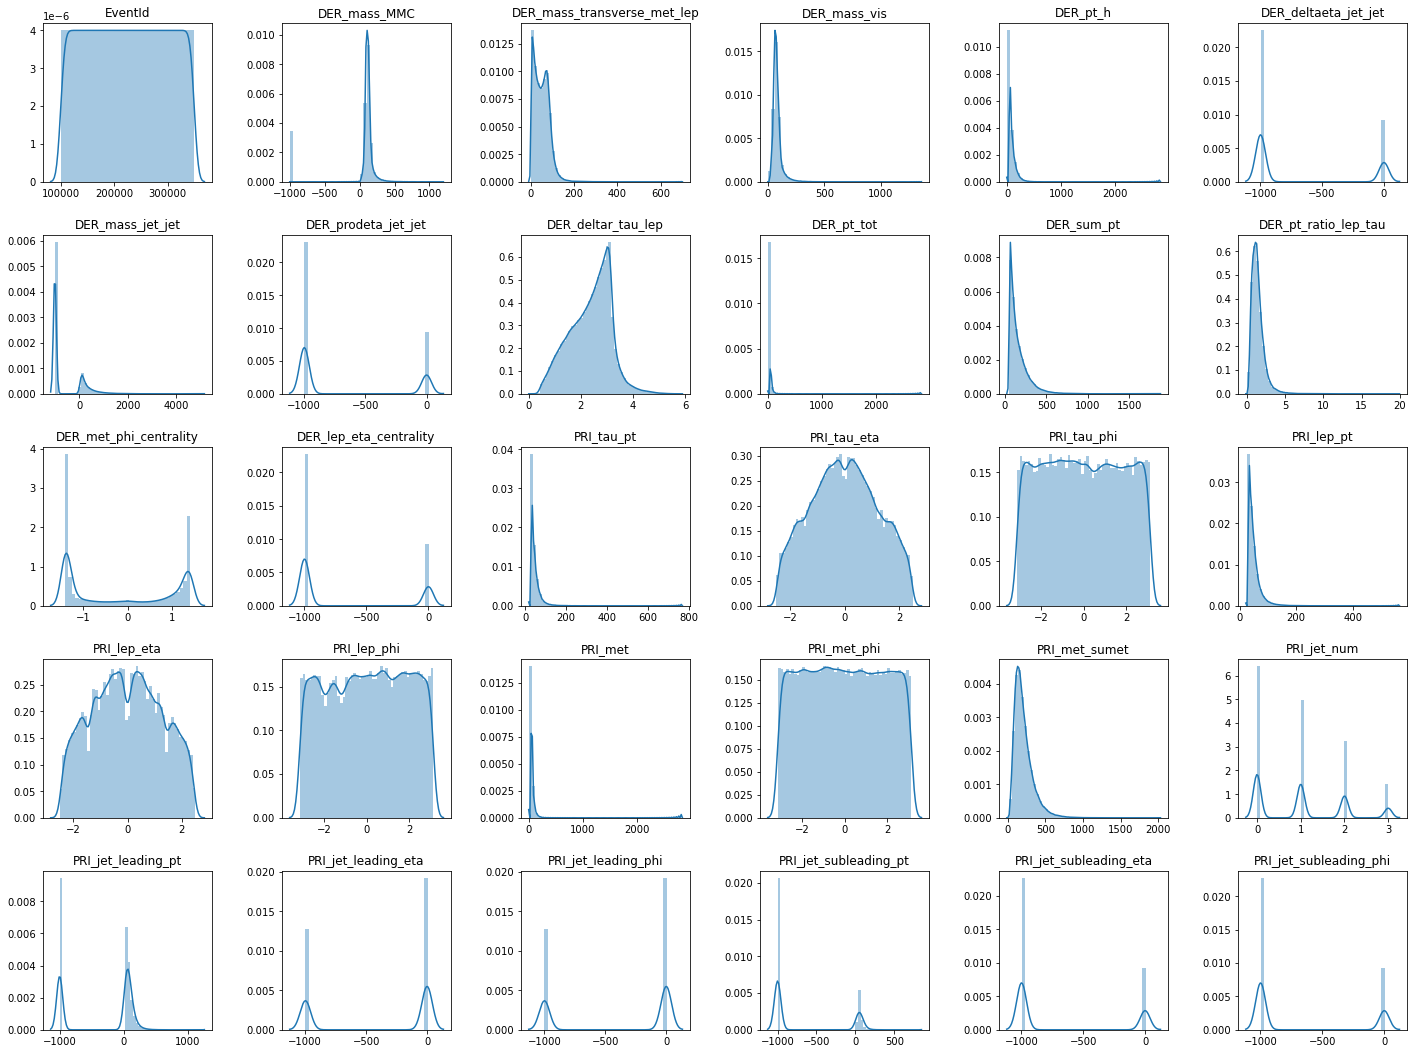

In [16]:
import seaborn as sns
fig, ax = plt.subplots(5,6, figsize=(20, 15))
ax = ax.flatten()
for i in range(30):
    sns.distplot(X.iloc[:,i].values, ax=ax[i])
    ax[i].set_title(X.columns[i])
fig.tight_layout(pad=2.0)

## DNN

In [77]:
from keras.models import Sequential
from keras.layers import Dense#create model
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout
from keras.layers import Embedding, Activation, Input, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, Reshape, MaxPooling2D, Conv1D , MaxPooling1D
model = Sequential()

#get number of columns in training data
n_cols = X.shape[1]

#add model layers
model.add(Dense(5, activation='relu', input_shape=(n_cols,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

In [78]:
from keras.callbacks import EarlyStopping#set early stopping monitor so the model stops training when it won't improve anymore
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["acc"])
early_stopping_monitor = EarlyStopping(patience=3)#train model
model.fit(X, Y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor],verbose=1)

Epoch 1/30
6250/6250 [==============================] - 29s 5ms/step - loss: 10876.4746 - acc: 0.5016 - val_loss: 5.5655 - val_acc: 0.5630
Epoch 2/30
6250/6250 [==============================] - 29s 5ms/step - loss: 36.7447 - acc: 0.5261 - val_loss: 14.2070 - val_acc: 0.3493
Epoch 3/30
6250/6250 [==============================] - 33s 5ms/step - loss: 35.4626 - acc: 0.5248 - val_loss: 303.7715 - val_acc: 0.3433
Epoch 4/30
6250/6250 [==============================] - 30s 5ms/step - loss: 30.4309 - acc: 0.5260 - val_loss: 337.0322 - val_acc: 0.3433


## XGB

In [31]:
from xgboost import XGBClassifier

clf = XGBClassifier(max_depth=5, learning_rate=0.05, n_estimators=300,
                    n_jobs=-1, random_state=0, reg_alpha=0.2, 
                    colsample_bylevel=0.9, colsample_bytree=0.9)

clf.fit(X, Y)
print('accuracy:',accuracy_score(clf.predict(X_test), Y_test))
# pickle.dump(clf, open("FARZIN_ARMIN.pickle.dat", "wb"))

[21:50:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.846404


Decision_Tree_Model Train Score is   :  0.7642666666666666
Linear_Discriminant_Analysis Train Score is   :  0.7454060606060606
Quadratic_Discriminant_Analysis Train Score is   :  0.7366666666666667
GaussianNBModel Train Score is   :  0.6759757575757576
BernoulliNBModel Train Score is   :  0.6444969696969697
logistic_regression Train Score is   :  0.7501575757575758
DNN Train Score is   :  0.5630
XGB Train Score is   :  0.846404

https://www.kaggle.com/c/higgs-boson
https://www.kaggle.com/jiahuali/jiahua-li-higgs-bosons